In [2]:
# Import Packages

import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os,datetime
import IPython
import IPython.display
import seaborn as sns
# from tensorflow.random import set_seed
import sklearn,pickle

# import tensorflow_addons as tfa 

# by using same seed with your friends, your friends and you will get the same result after computer generated "randomness"


In [3]:
# Data Loading

csv_path= 'Dataset/ecommerceDataset.csv'

print(csv_path)

Dataset/ecommerceDataset.csv


In [4]:
# Put into a dataframe


column_name = ['Category','Product Detail']

df = pd.read_csv(csv_path ,names=column_name)  # put the csv into dataframe, since the csv file doesnt have column name, we create a new one


print(df.head(5)) # checking the first 5 row 

    Category                                     Product Detail
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


In [5]:
# Checking the dataset info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        50425 non-null  object
 1   Product Detail  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None


In [6]:
# Dataframe describe part

print(df.describe())

# There 4 unique categories, with total of 50425

         Category                                     Product Detail
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                                                 30


In [7]:
# Checking if there are null values

df.isna().sum().sort_values(ascending = False)

Product Detail    1
Category          0
dtype: int64

In [8]:
# Checking the null values row

null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

                     Category Product Detail
39330  Clothing & Accessories            NaN


In [9]:
# Remove Null values

df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50424 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        50424 non-null  object
 1   Product Detail  50424 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [ ]:
# Checking and doing Data Inspection again 

print("Shape of the Data:", df.shape)
print("Null of the Data:", df.isna().sum())
print("Duplication of the Data:", df.duplicated().sum())
print("Categories: ", df['Category'].value_counts())

Shape of the Data: (50424, 2)
Null of the Data: Category          0
Product Detail    0
dtype: int64
Duplication of the Data: 22622
Categories:  Category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64


In [ ]:
# Data Preprocessing
# Seperate the feature and the label

import sklearn.preprocessing


feature = df['Product Detail'].values

label = df['Category'].values

# Perform Label Encoder on category column

le = sklearn.preprocessing.LabelEncoder()

label_encoded = le.fit_transform(label)

print(label_encoded[:5])

[3 3 3 3 3]


In [ ]:
# Inverse Transfrom using Label Encoder (Testing to see which one which)

sample_category = le.inverse_transform([0,1,2,3])

print(sample_category)

['Books' 'Clothing & Accessories' 'Electronics' 'Household']


In [ ]:
# Perform Train-Val-Test Split

seed = 42

X_train, X_split, y_train, y_split = train_test_split(feature, label_encoded, train_size=0.7, random_state=seed )   # Spliting dataset into 70% for training and remaining 30% for further splitting

X_val, X_test, y_val, y_test = train_test_split(X_split, y_split, train_size=0.5, random_state=seed )   # Spliting dataset equally for validation and testing

In [ ]:
# NLP 
# Tokenization

tokenizer = keras.layers.TextVectorization(max_tokens=5000, output_sequence_length=200) # Tokenizer Process

tokenizer.adapt(X_train)    # Tokenizer Process to X train

In [16]:
# Testing how the tokenizer works

sample_tokens = tokenizer(X_train[:2])
print(X_train[:2])
print(sample_tokens)

["Acer 18.5 inch (46.99 cm) LED Monitor - EB192Q (Black) Specifications LED 18.5 '' ACER EB192Qb (B). Brand ACER Model EB192Qb Response Time 5 ms Max. Resolution 1366x768 @ 60Hz Contrast Ratio 100 million: 1 (ACM). Brightness 200 nits (cd / m2). Display 18.5 inch Color System 16.7 m POWER Supply (100V-240V): Internal Power Consumption (Off): 0.45W Power Consumption (Sleep): 14W Power Consumption (on): 18W. VGA Port 1 Port."
 'SOUMIK ELECTRICALS 5-inch Subwoofer with Maximum 4 ohm(100 W) Thisb product is from the brand SOUMIK ELECTRICALS it presents a 5 Inch subwoofer with maximum 4 ohm and comes with 100W. Use in your home theatre.']
tf.Tensor(
[[3365 4947  173    1  147  152  622    1   55  595  152 4947 3365    1
  1613  151 3365  535    1 1478   61  105 1551  739  649    1    1 1619
  1972  115 1539   36    1 1495 1270    1 1373 3153  259 4947  173   65
   146    1  805   59  781    1 1290   59 1111  253    1   59 1111  943
     1   59 1111   15    1 1210  377   36  377    0    0   

In [ ]:
# Embedding 

embedding = keras.layers.Embedding(5000, 64)    # Embedding process

In [ ]:
# Model Development

model = keras.Sequential()  # Sequential layer

# NLP Layers

model.add(tokenizer)    # Tokenizer layer
model.add(embedding)    # Embedding layer

# RNN Layers

model.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=False)))    # Bidirectional LSTM layer
# model.add(keras.layers.Bidirectional(keras.layers.LSTM(16, return_sequences=True)))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(len(df["Category"].unique()), activation="softmax"))   # Output layer



In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])


In [ ]:
# Model Training

logpath = "TensorBoard/Ecommerce" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = keras.callbacks.TensorBoard(logpath)

es = keras.callbacks.EarlyStopping(patience=2, verbose=3)

# Model Training Arc

history = model.fit(
    X_train,    
    y_train,
    validation_data =(X_val,y_val),
    epochs = 10,
    batch_size = 32,
    callbacks = [tb, es]
    )

Epoch 1/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 52s 45ms/step - accuracy: 0.8037 - loss: 0.5355 - val_accuracy: 0.9622 - val_loss: 0.1428
Epoch 2/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 55s 50ms/step - accuracy: 0.9730 - loss: 0.1038 - val_accuracy: 0.9680 - val_loss: 0.1157
Epoch 3/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - accuracy: 0.9821 - loss: 0.0706 - val_accuracy: 0.9733 - val_loss: 0.1060
Epoch 4/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 49s 45ms/step - accuracy: 0.9867 - loss: 0.0481 - val_accuracy: 0.9717 - val_loss: 0.1125
Epoch 5/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 51s 47ms/step - accuracy: 0.9909 - loss: 0.0334 - val_accuracy: 0.9716 - val_loss: 0.1214
Epoch 5: early stopping


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (32, 200)              │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (32, 200, 64)          │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (32, 64)               │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,278 (3.95 MB)

 Trainable params: 345,092 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 690,186 (2.63 MB)

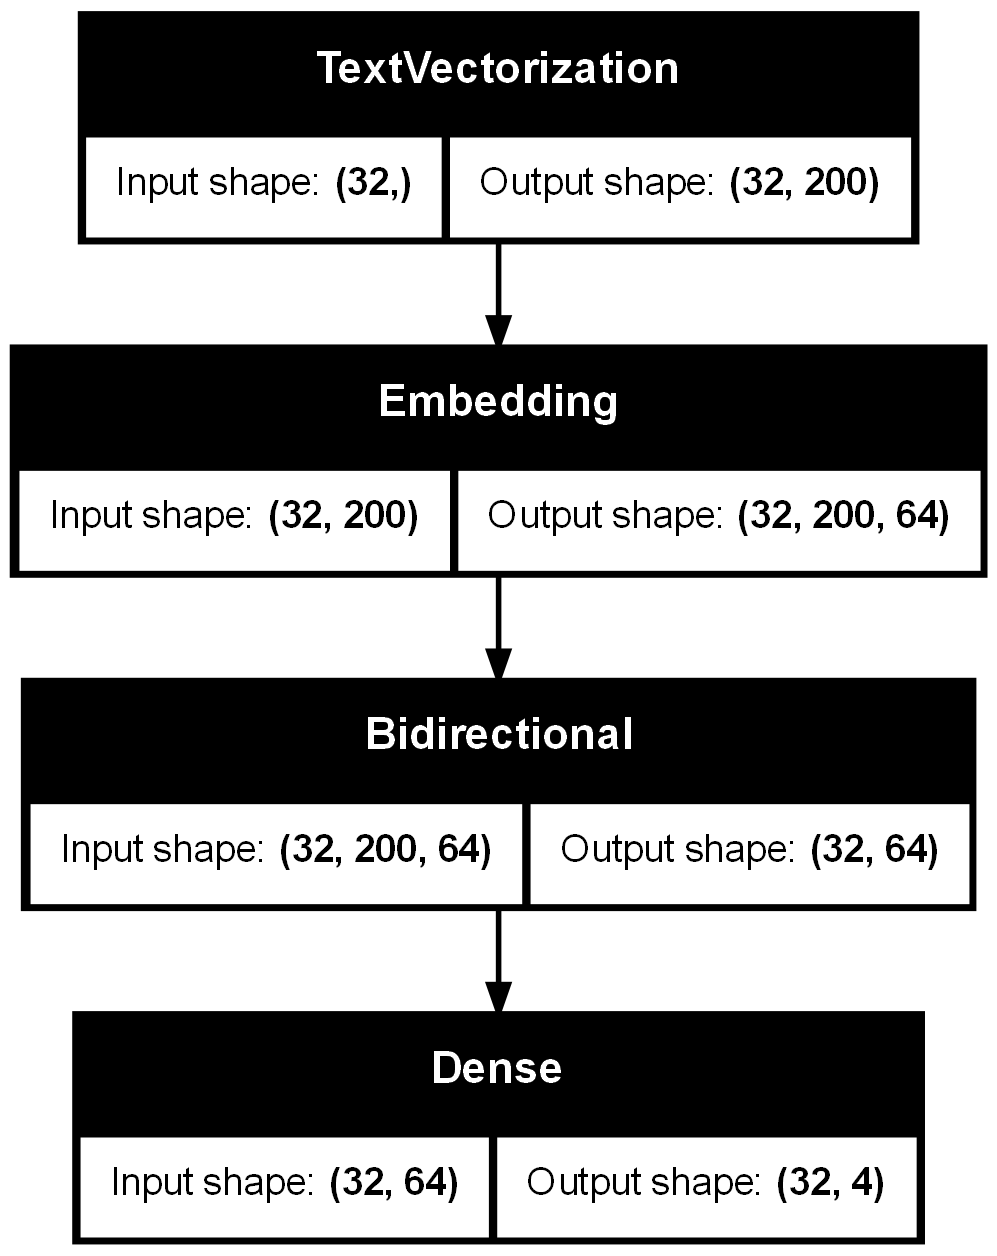

In [ ]:
# The model architecture

model.summary() # short summary
keras.utils.plot_model(model, show_shapes=True) # to show the flow

In [ ]:
# Evaluation of the model

evaluation = model.evaluate(X_test, y_test) # Evaluation

print(f"\nThis is the accuracy for this model :{evaluation[1]}")
print(f"\nThis is the loss for this model :{evaluation[0]}")


237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9761 - loss: 0.1046

This is the accuracy for this model :0.9713114500045776

This is the loss for this model :0.12985114753246307


In [ ]:
# F1 Score using Classification Report 

predictions1 = model.predict(X_test)
predictions1_index = np.argmax(predictions1, axis=1)

model_report = classification_report(y_test, predictions1_index)    # Classification report
print(model_report)

model_report1 = classification_report(y_test, predictions1_index, output_dict=True) # Classification report with output dictionary


f1score = model_report1['macro avg']['f1-score']
print(f"This is the F1Score for this model :{f1score}") # the F1Score value for this model



237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1756
           1       0.98      0.97      0.98      1312
           2       0.96      0.97      0.96      1560
           3       0.97      0.97      0.97      2936

    accuracy                           0.97      7564
   macro avg       0.97      0.97      0.97      7564
weighted avg       0.97      0.97      0.97      7564

This is the F1Score for this model :0.9713222993632258


In [ ]:
# Use the model to make prediction (inference)

predictions = model.predict(X_test[:20])
class_predictions = le.inverse_transform(np.argmax(predictions, axis=1))    # inverse transform to get the label value from encoder

print(f"\nThe predicted category: {class_predictions}")             # Comparing the result between real and predicition values

print(f"\nThe real category: {le.inverse_transform(y_test[:20])}")   # Comparing the result between real and predicition values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

The predicted category: ['Books' 'Household' 'Household' 'Clothing & Accessories'
 'Clothing & Accessories' 'Clothing & Accessories' 'Books' 'Household'
 'Household' 'Household' 'Household' 'Household' 'Household' 'Electronics'
 'Household' 'Household' 'Household' 'Household' 'Clothing & Accessories'
 'Clothing & Accessories']

The real category: ['Books' 'Household' 'Household' 'Clothing & Accessories'
 'Clothing & Accessories' 'Clothing & Accessories' 'Books' 'Household'
 'Household' 'Household' 'Household' 'Household' 'Household' 'Electronics'
 'Household' 'Household' 'Household' 'Household' 'Clothing & Accessories'
 'Clothing & Accessories']


In [29]:
# To save the model tokenizer

with open("tokenizer.json","wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder.json","wb") as f:
    pickle.dump(le, f)

In [30]:
# To the save Model

Model_path = os.path.join(os.getcwd(),'Model','ecommerce_model.h5')
with open (Model_path,"wb") as file:
    pickle.dump('ecommerce_model.h5',file)